<a href="https://colab.research.google.com/github/jayasuryajsk/quarantine-time-pass/blob/master/100-birds-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download gpiosenka/100-bird-species


In [0]:
from fastai.vision import*
from fastai.metrics import error_rate

In [33]:
path = Path('/content/birds/consolidated/')

ERROR! Session/line number was not unique in database. History logging moved to new session 61


In [0]:
bs = 64 #batch size

In [0]:
tfms = get_transforms(do_flip=True,max_lighting=0.1,max_rotate=0.1)

In [0]:
data = ImageDataBunch.from_folder(path,train='.',valid_pct=0.15,ds_tfms=tfms,size=224,num_workers=4)

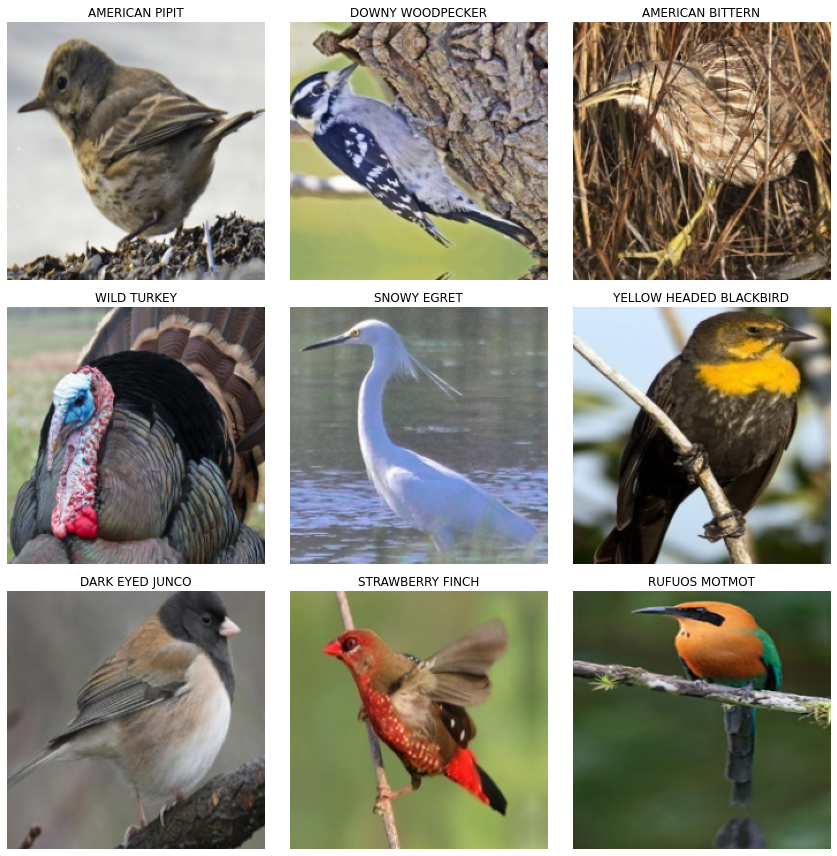

In [40]:
data.show_batch(3)

In [41]:
len(data.classes), len(data.train_ds), len(data.valid_ds)

(175, 21596, 3811)

In [0]:
fb = FBeta()
fb.average = 'macro'

In [0]:
learn = cnn_learner(data,models.resnet34,metrics=[error_rate,fb])

In [48]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [49]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,f_beta,time
0,1.152382,0.464885,0.120441,0.873563,02:32
1,0.620122,0.311427,0.087903,0.905621,02:32
2,0.379032,0.230525,0.064288,0.931275,02:35
3,0.265852,0.201248,0.059040,0.938151,02:42


BANANAQUIT


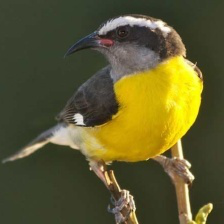

In [59]:
file = '/content/birds/test/BANANAQUIT/3.jpg'
img = open_image(file)
print(learn.predict(img)[0])
img

ALBATROSS


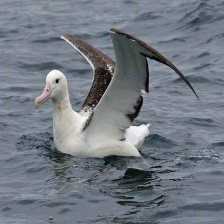

In [60]:
file = '/content/birds/test/ALBATROSS/5.jpg'
img = open_image(file)
print(learn.predict(img)[0])
img